In [145]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random
import time
from nxsim import BaseNetworkAgent
from datetime import datetime
nx.__version__

'2.2'

In [168]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (24, 12))
# Font size to 14
matplotlib.rc('font', size = 20)
# Add grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

In [148]:
read_data = pd.read_csv("pnas.1713568115.sd01.txt") #read the data file, no cleaning required
read_data = read_data[read_data['trial'] == 1]  #take the data for the 1st trial only
data = read_data
data.head(10)
#print(len(data))
#type(data)



data['time'] = data['end'] - data['begin']#store the diff btw begin and end to get total time for each trans. in ms
data['time'] = data['time']/1000.0 #change 'ms' to 's'
data['time'] = data['time'].map(lambda x: [x]) #convert the time attr to list as as there are multiple iteractions between two bees

In [149]:
data.head(10)

,trial,id1,id2,begin,end,time
0,1,201,219,1.373105e+12,1.373105e+12,[2.0]
1,1,201,219,1.373109e+12,1.373109e+12,[42.0]
2,1,201,242,1.373119e+12,1.373119e+12,[2.0]
3,1,201,242,1.373119e+12,1.373119e+12,[2.999]
4,1,201,255,1.372958e+12,1.372958e+12,[41.999]
5,1,201,259,1.372937e+12,1.372937e+12,[15.0]
6,1,201,259,1.373041e+12,1.373041e+12,[3.0]
7,1,201,259,1.373240e+12,1.373240e+12,[8.0]
8,1,201,262,1.373360e+12,1.373360e+12,[27.999]
9,1,201,263,1.373178e+12,1.373178e+12,[2.0]


In [151]:
data['begin'] = data['begin']/1000.0 #change 'ms' to 's'


data.head(10)

,trial,id1,id2,begin,end,time,UTC
0,1,201,219,1.373105e+09,1.373105e+12,[2.0],2013-07-06 10:05:05
1,1,201,219,1.373109e+09,1.373109e+12,[42.0],2013-07-06 11:14:59
2,1,201,242,1.373119e+09,1.373119e+12,[2.0],2013-07-06 13:56:42
3,1,201,242,1.373119e+09,1.373119e+12,[2.999],2013-07-06 13:57:10
4,1,201,255,1.372958e+09,1.372958e+12,[41.999],2013-07-04 17:14:29
5,1,201,259,1.372937e+09,1.372937e+12,[15.0],2013-07-04 11:28:14
6,1,201,259,1.373041e+09,1.373041e+12,[3.0],2013-07-05 16:11:35
7,1,201,259,1.373240e+09,1.373240e+12,[8.0],2013-07-07 23:33:29
8,1,201,262,1.373360e+09,1.373360e+12,[27.999],2013-07-09 08:54:53
9,1,201,263,1.373178e+09,1.373178e+12,[2.0],2013-07-07 06:25:01


In [153]:
data['day'] = data['begin'].map(lambda x: int(datetime.utcfromtimestamp(x).strftime('%d')))
data.head(10)

,trial,id1,id2,begin,end,time,UTC,day
0,1,201,219,1.373105e+09,1.373105e+12,[2.0],2013-07-06 10:05:05,6
1,1,201,219,1.373109e+09,1.373109e+12,[42.0],2013-07-06 11:14:59,6
2,1,201,242,1.373119e+09,1.373119e+12,[2.0],2013-07-06 13:56:42,6
3,1,201,242,1.373119e+09,1.373119e+12,[2.999],2013-07-06 13:57:10,6
4,1,201,255,1.372958e+09,1.372958e+12,[41.999],2013-07-04 17:14:29,4
5,1,201,259,1.372937e+09,1.372937e+12,[15.0],2013-07-04 11:28:14,4
6,1,201,259,1.373041e+09,1.373041e+12,[3.0],2013-07-05 16:11:35,5
7,1,201,259,1.373240e+09,1.373240e+12,[8.0],2013-07-07 23:33:29,7
8,1,201,262,1.373360e+09,1.373360e+12,[27.999],2013-07-09 08:54:53,9
9,1,201,263,1.373178e+09,1.373178e+12,[2.0],2013-07-07 06:25:01,7


In [154]:
data['UTC'] = data['begin'].map(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
data.head(10)

,trial,id1,id2,begin,end,time,UTC,day
0,1,201,219,1.373105e+09,1.373105e+12,[2.0],2013-07-06 10:05:05,6
1,1,201,219,1.373109e+09,1.373109e+12,[42.0],2013-07-06 11:14:59,6
2,1,201,242,1.373119e+09,1.373119e+12,[2.0],2013-07-06 13:56:42,6
3,1,201,242,1.373119e+09,1.373119e+12,[2.999],2013-07-06 13:57:10,6
4,1,201,255,1.372958e+09,1.372958e+12,[41.999],2013-07-04 17:14:29,4
5,1,201,259,1.372937e+09,1.372937e+12,[15.0],2013-07-04 11:28:14,4
6,1,201,259,1.373041e+09,1.373041e+12,[3.0],2013-07-05 16:11:35,5
7,1,201,259,1.373240e+09,1.373240e+12,[8.0],2013-07-07 23:33:29,7
8,1,201,262,1.373360e+09,1.373360e+12,[27.999],2013-07-09 08:54:53,9
9,1,201,263,1.373178e+09,1.373178e+12,[2.0],2013-07-07 06:25:01,7


In [155]:
data['hours'] = data['begin'].map(lambda x: int(datetime.utcfromtimestamp(x).strftime('%H')))
data.head(10)

,trial,id1,id2,begin,end,time,UTC,day,hours
0,1,201,219,1.373105e+09,1.373105e+12,[2.0],2013-07-06 10:05:05,6,10
1,1,201,219,1.373109e+09,1.373109e+12,[42.0],2013-07-06 11:14:59,6,11
2,1,201,242,1.373119e+09,1.373119e+12,[2.0],2013-07-06 13:56:42,6,13
3,1,201,242,1.373119e+09,1.373119e+12,[2.999],2013-07-06 13:57:10,6,13
4,1,201,255,1.372958e+09,1.372958e+12,[41.999],2013-07-04 17:14:29,4,17
5,1,201,259,1.372937e+09,1.372937e+12,[15.0],2013-07-04 11:28:14,4,11
6,1,201,259,1.373041e+09,1.373041e+12,[3.0],2013-07-05 16:11:35,5,16
7,1,201,259,1.373240e+09,1.373240e+12,[8.0],2013-07-07 23:33:29,7,23
8,1,201,262,1.373360e+09,1.373360e+12,[27.999],2013-07-09 08:54:53,9,8
9,1,201,263,1.373178e+09,1.373178e+12,[2.0],2013-07-07 06:25:01,7,6


In [156]:
data = data.sort_values('begin')
data.head(20)

,trial,id1,id2,begin,end,time,UTC,day,hours
102932,1,612,1697,1.372829e+09,1.372829e+12,[3.0],2013-07-03 05:29:18,3,5
138807,1,740,829,1.372829e+09,1.372829e+12,[2.0],2013-07-03 05:29:23,3,5
225447,1,1138,1305,1.372829e+09,1.372829e+12,[5.999],2013-07-03 05:29:32,3,5
11636,1,267,876,1.372829e+09,1.372829e+12,[11.0],2013-07-03 05:29:41,3,5
126121,1,701,912,1.372829e+09,1.372829e+12,[10.0],2013-07-03 05:29:41,3,5
119604,1,667,1460,1.372829e+09,1.372829e+12,[17.0],2013-07-03 05:29:49,3,5
189002,1,938,1322,1.372829e+09,1.372829e+12,[2.0],2013-07-03 05:29:52,3,5
243670,1,1248,1657,1.372829e+09,1.372829e+12,[4.0],2013-07-03 05:30:18,3,5
234946,1,1205,1593,1.372829e+09,1.372829e+12,[16.999],2013-07-03 05:30:25,3,5
21359,1,288,643,1.372829e+09,1.372829e+12,[2.0],2013-07-03 05:30:25,3,5


In [159]:
data.tail(10)

,trial,id1,id2,begin,end,time,UTC,day,hours
163052,1,841,1500,1.373780e+09,1.373780e+12,[2.0],2013-07-14 05:34:34,14,5
222837,1,1114,1177,1.373780e+09,1.373780e+12,[13.0],2013-07-14 05:34:34,14,5
195908,1,959,1855,1.373780e+09,1.373780e+12,[2.0],2013-07-14 05:34:38,14,5
297200,1,1796,1903,1.373780e+09,1.373780e+12,[11.0],2013-07-14 05:34:40,14,5
302062,1,2007,2010,1.373780e+09,1.373780e+12,[4.0],2013-07-14 05:34:44,14,5
7701,1,258,1218,1.373780e+09,1.373780e+12,[2.999],2013-07-14 05:35:05,14,5
133194,1,724,1632,1.373780e+09,1.373780e+12,[6.0],2013-07-14 05:35:36,14,5
93952,1,567,1444,1.373780e+09,1.373780e+12,[2.0],2013-07-14 05:35:45,14,5
102184,1,611,903,1.373780e+09,1.373780e+12,[7.0],2013-07-14 05:35:50,14,5
194268,1,953,1738,1.373780e+09,1.373780e+12,[2.0],2013-07-14 05:35:56,14,5


In [158]:
unique_days = data.day.unique()
unique_days

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

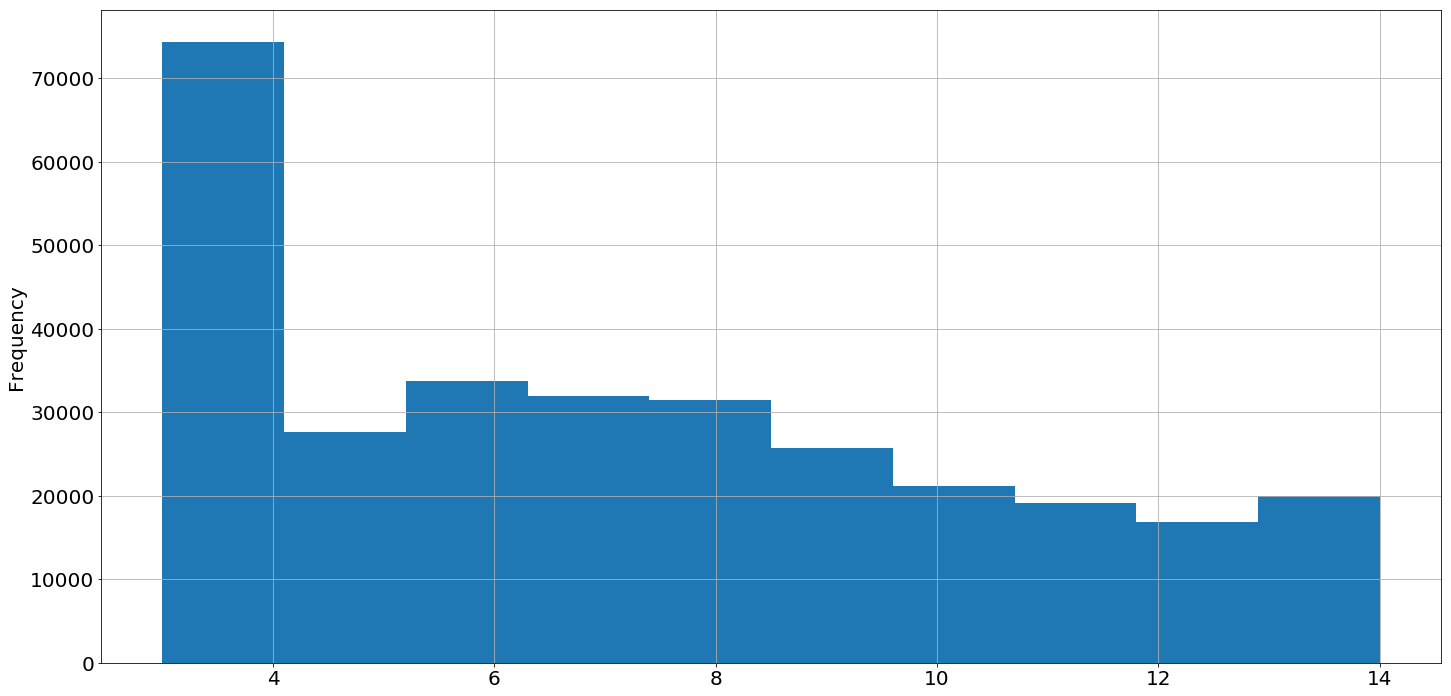

In [142]:
#data_day_3 = data[data['day'] =='03']
data_day_3
data.head(10)
data['day'].plot(kind='hist')
plt.show()

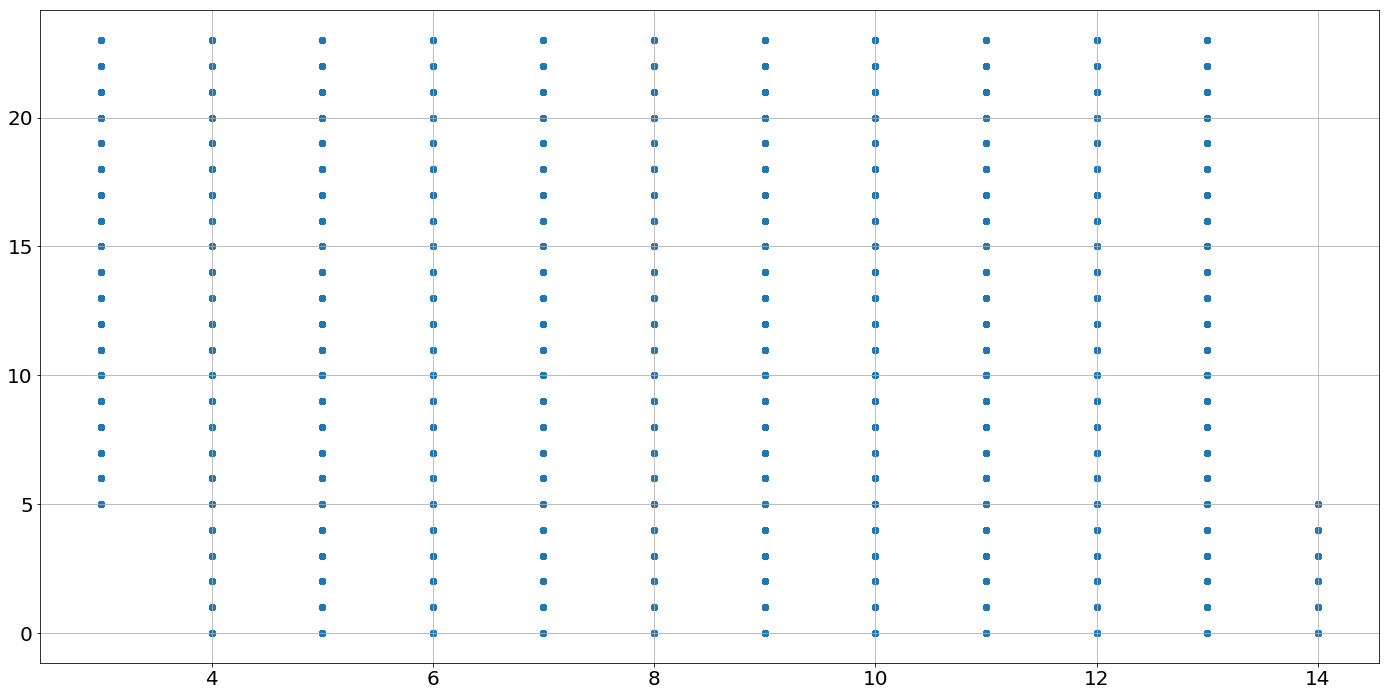

In [160]:
plt.scatter(data.day,data.hours)

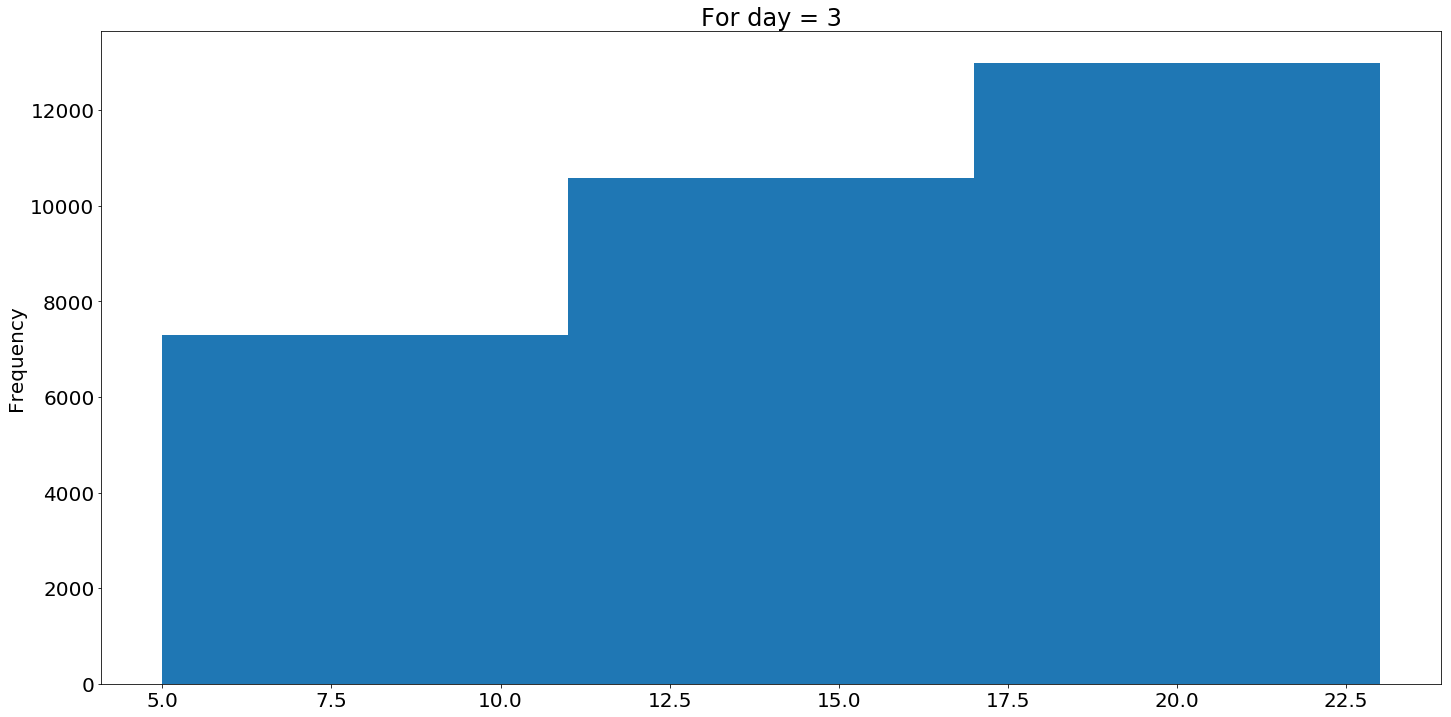

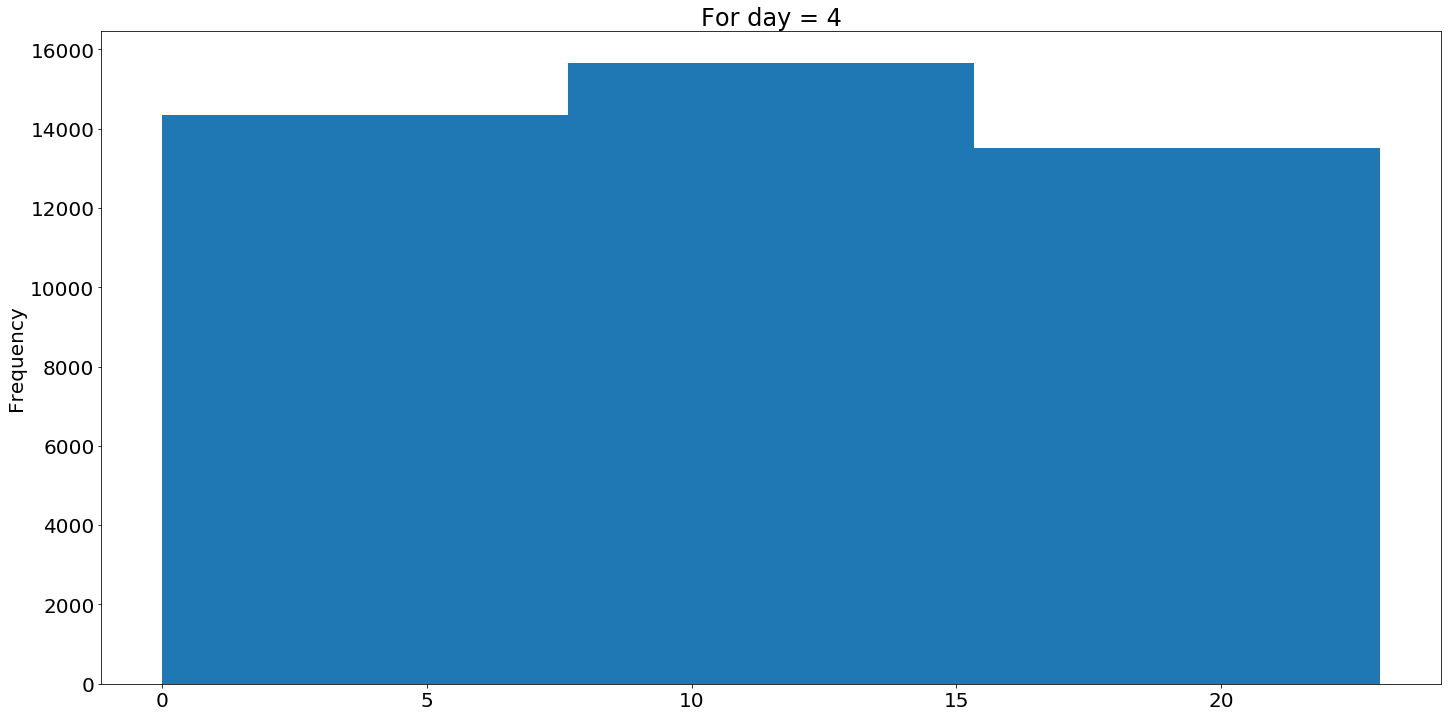

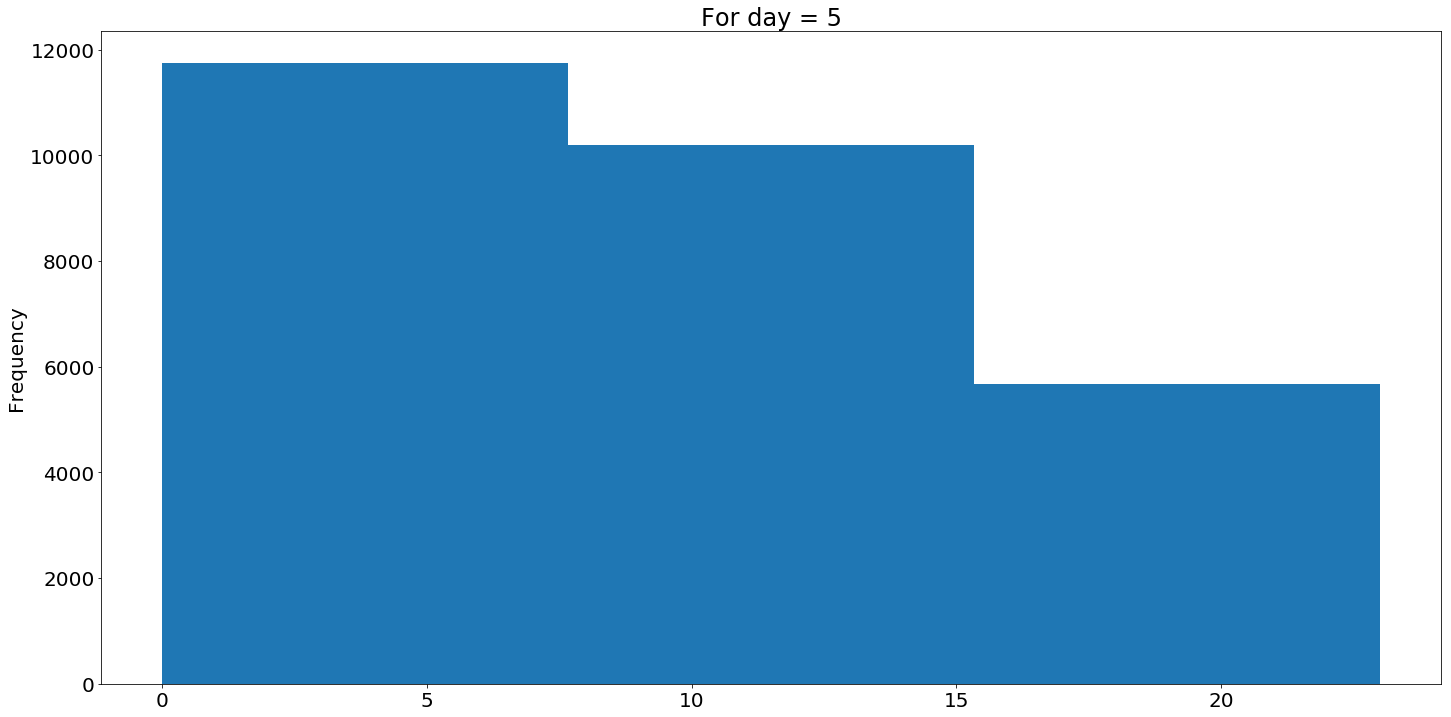

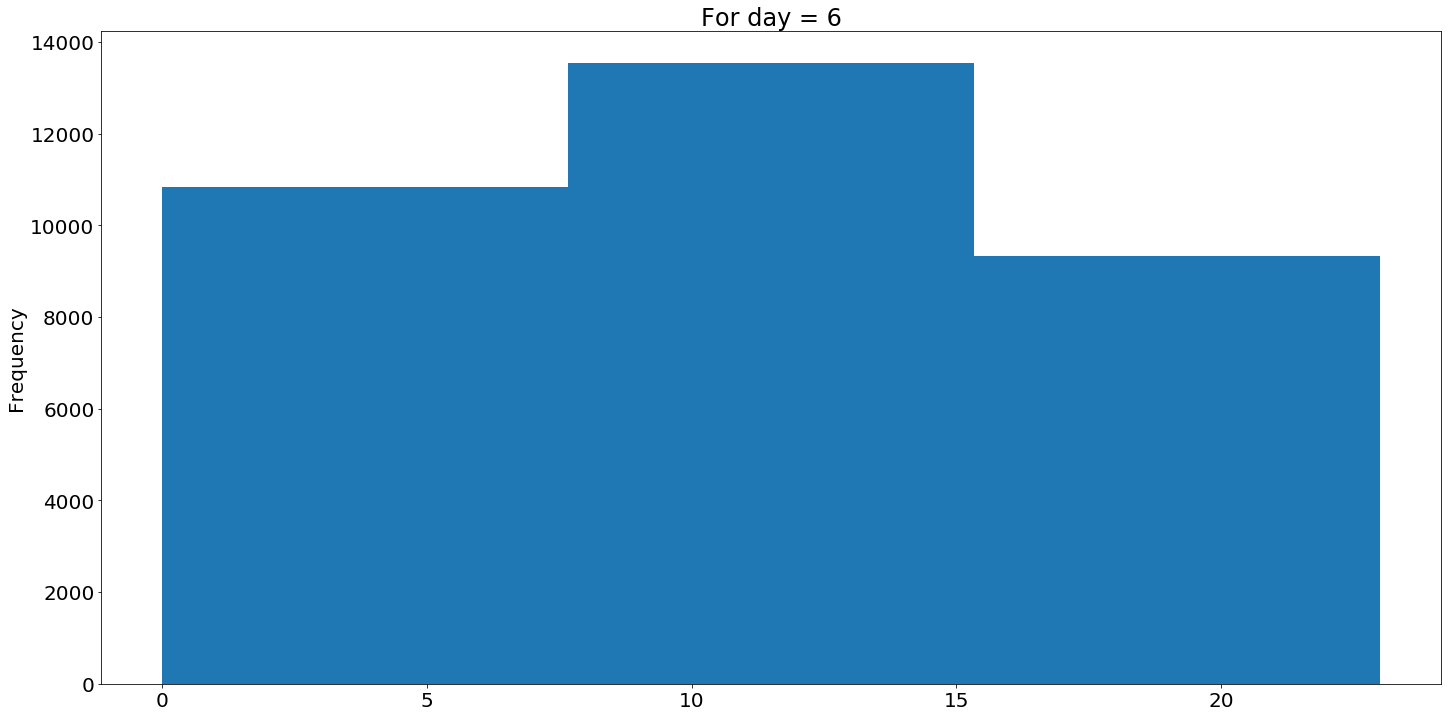

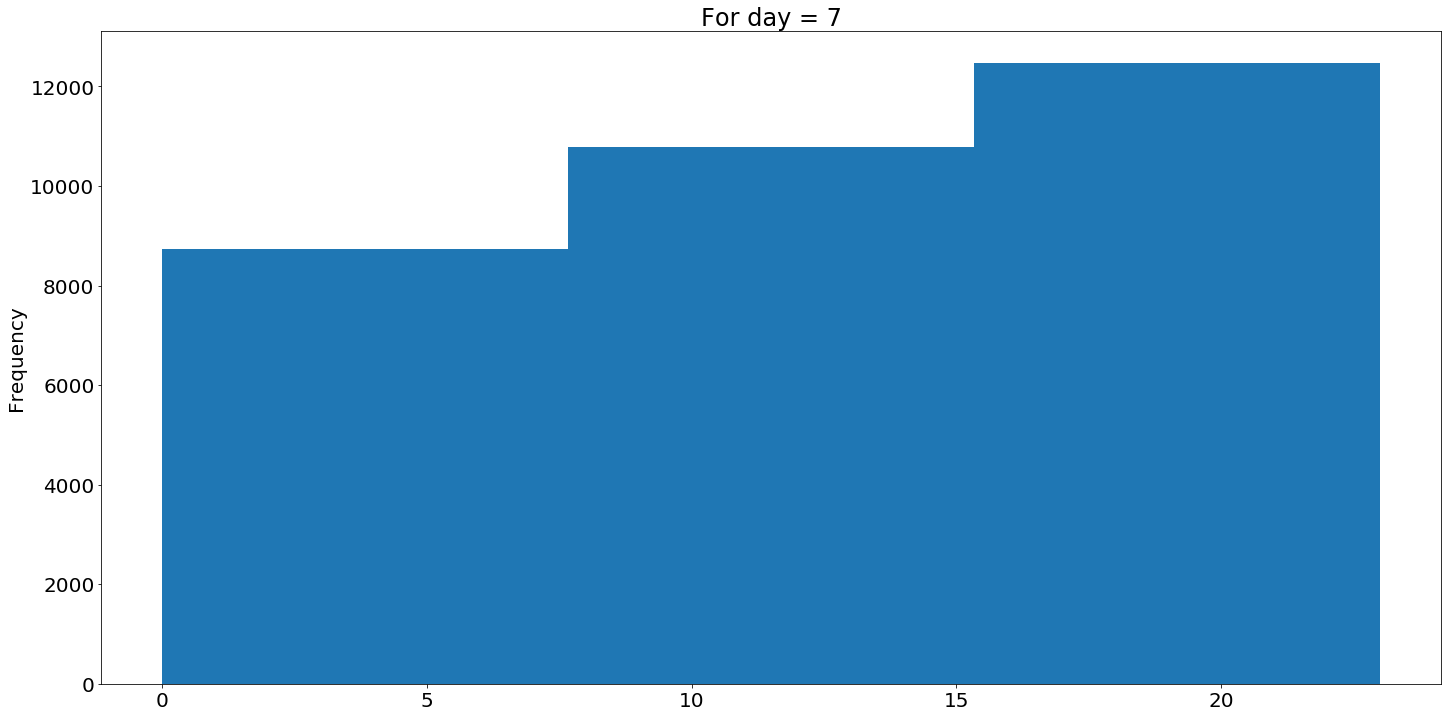

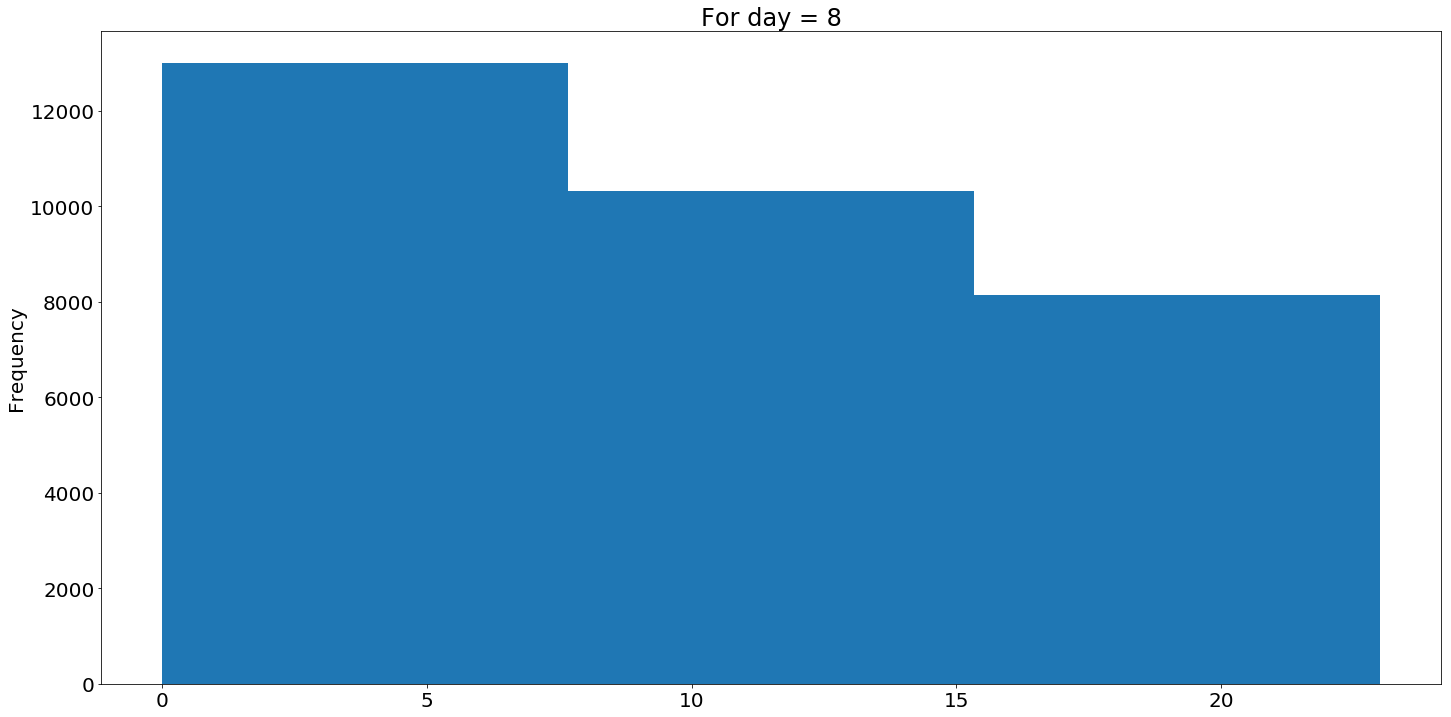

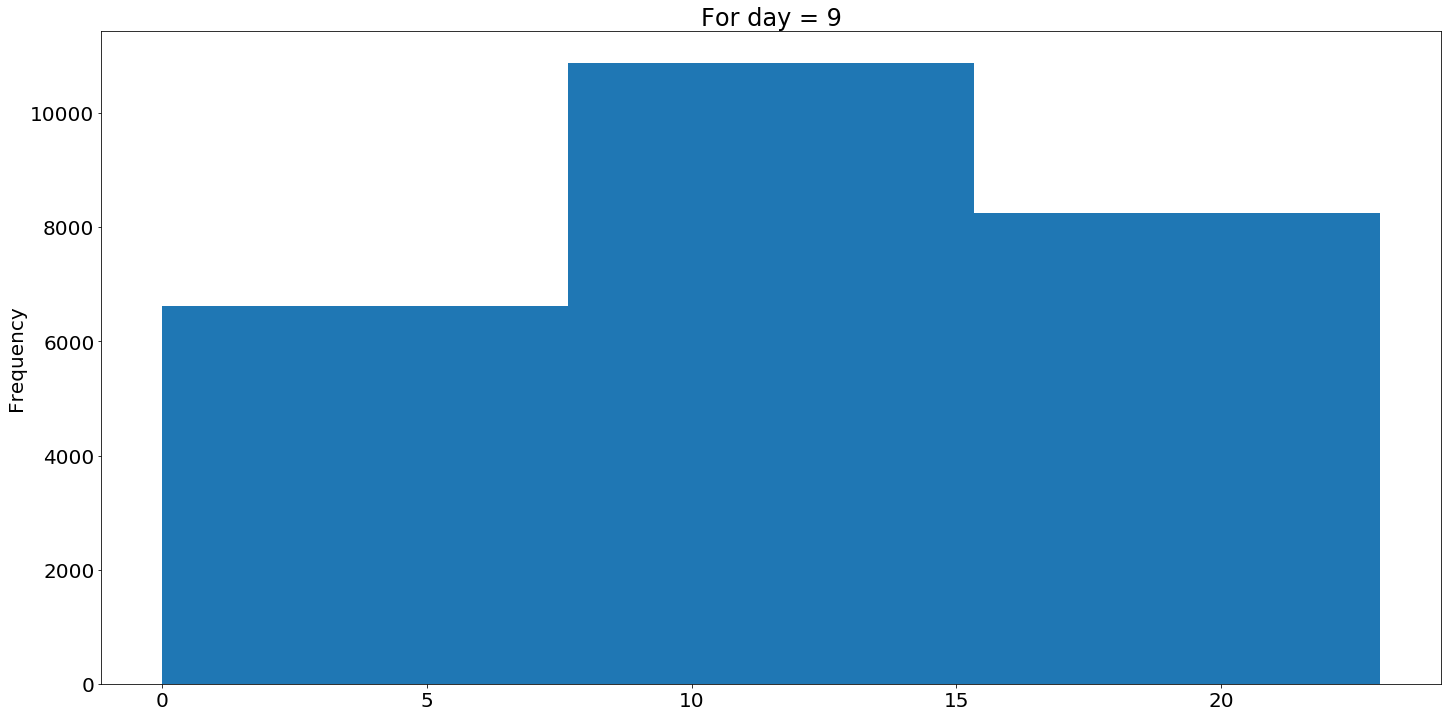

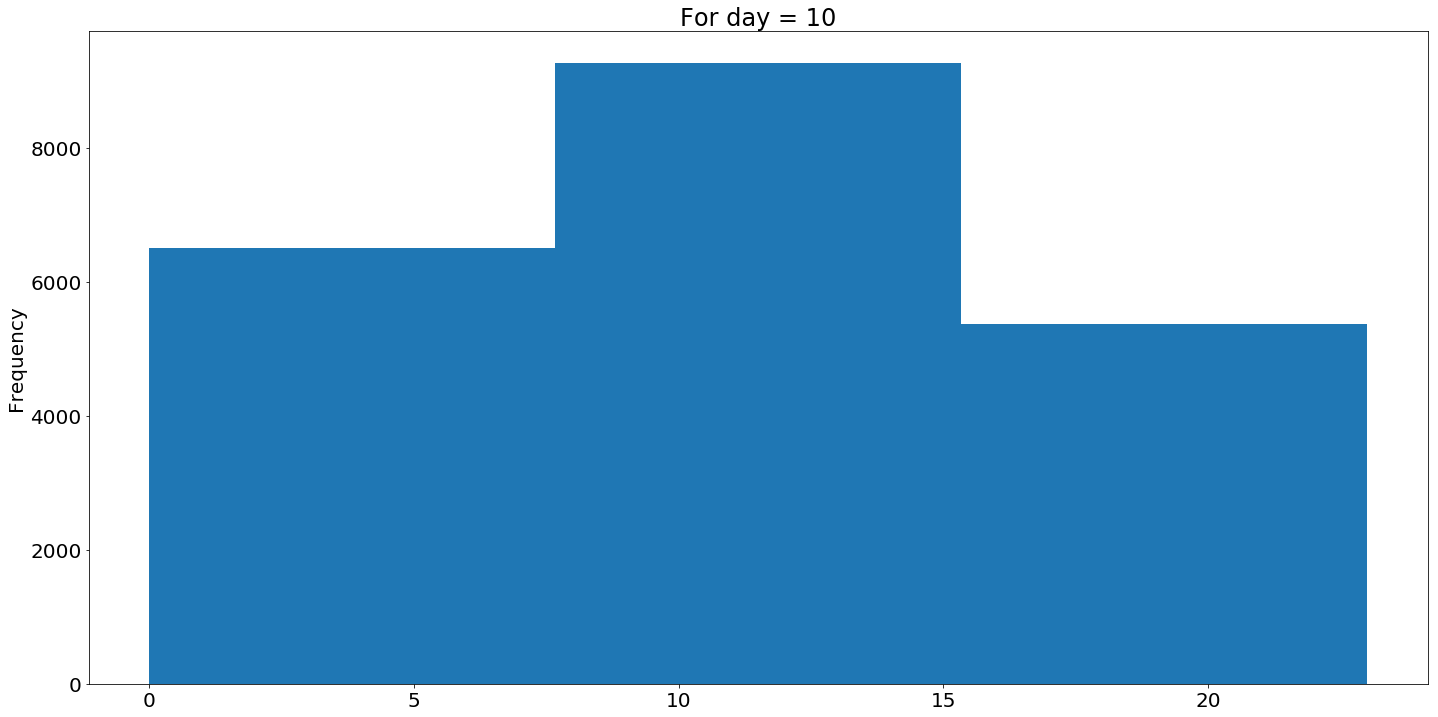

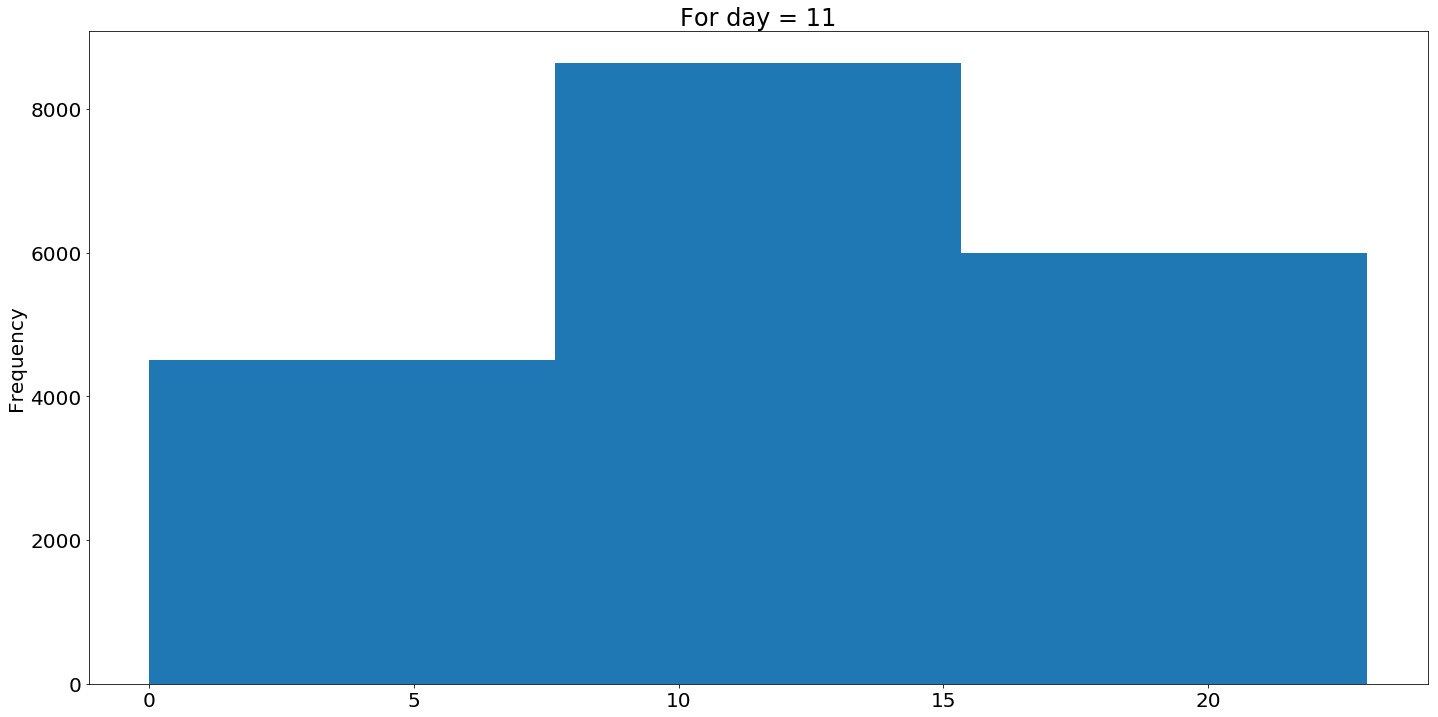

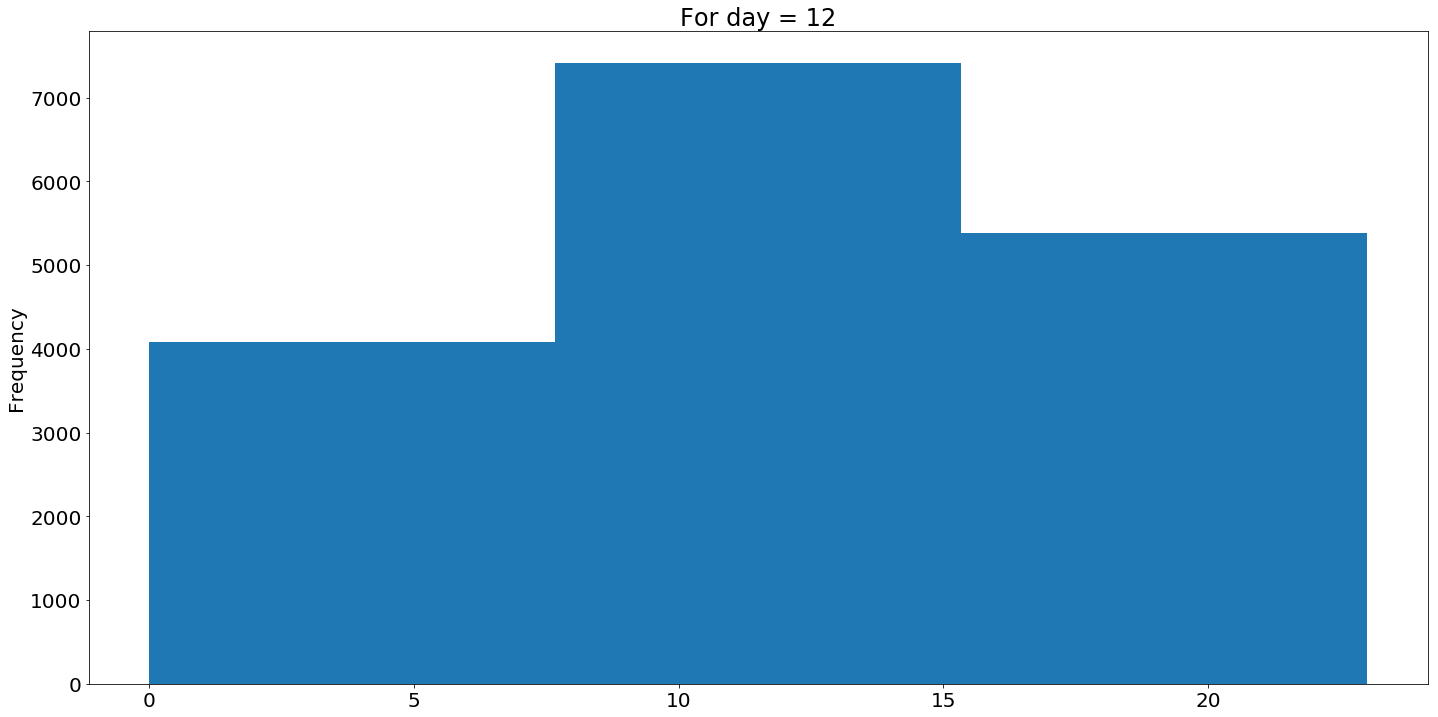

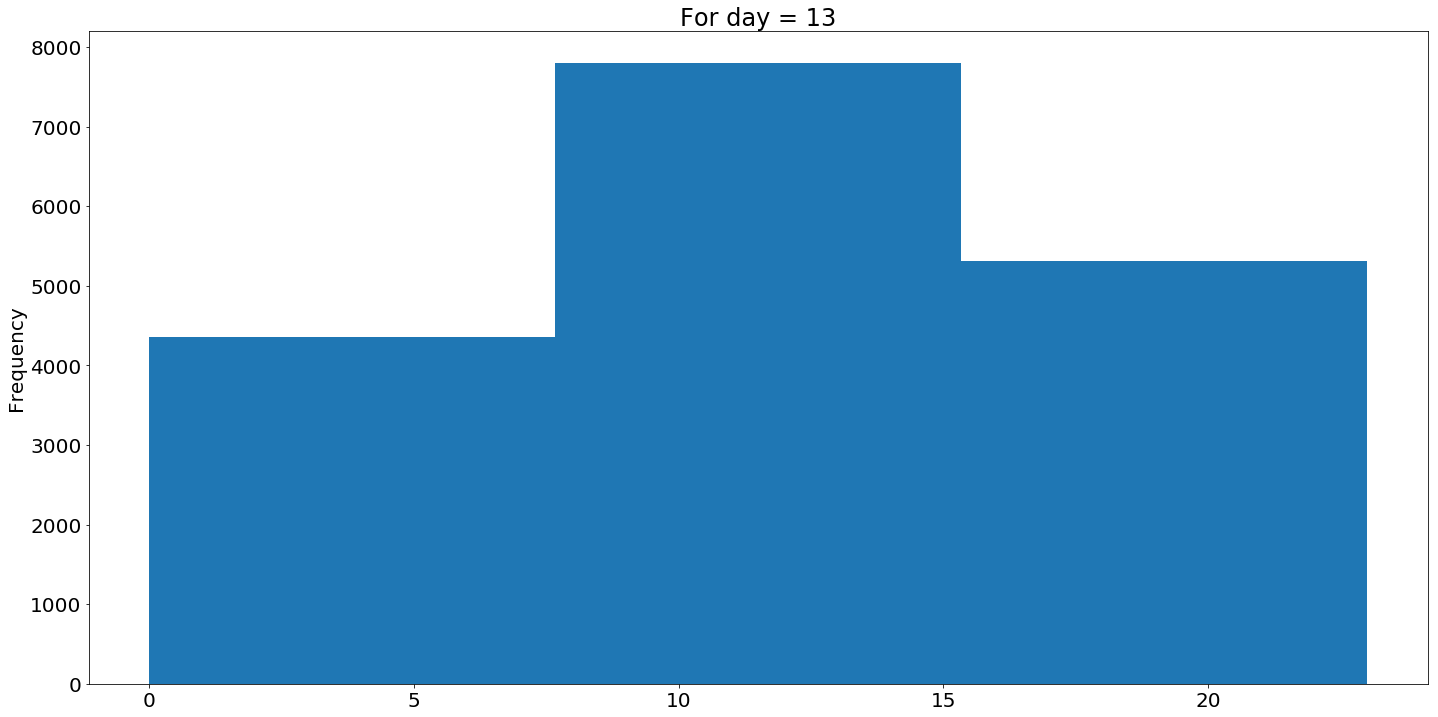

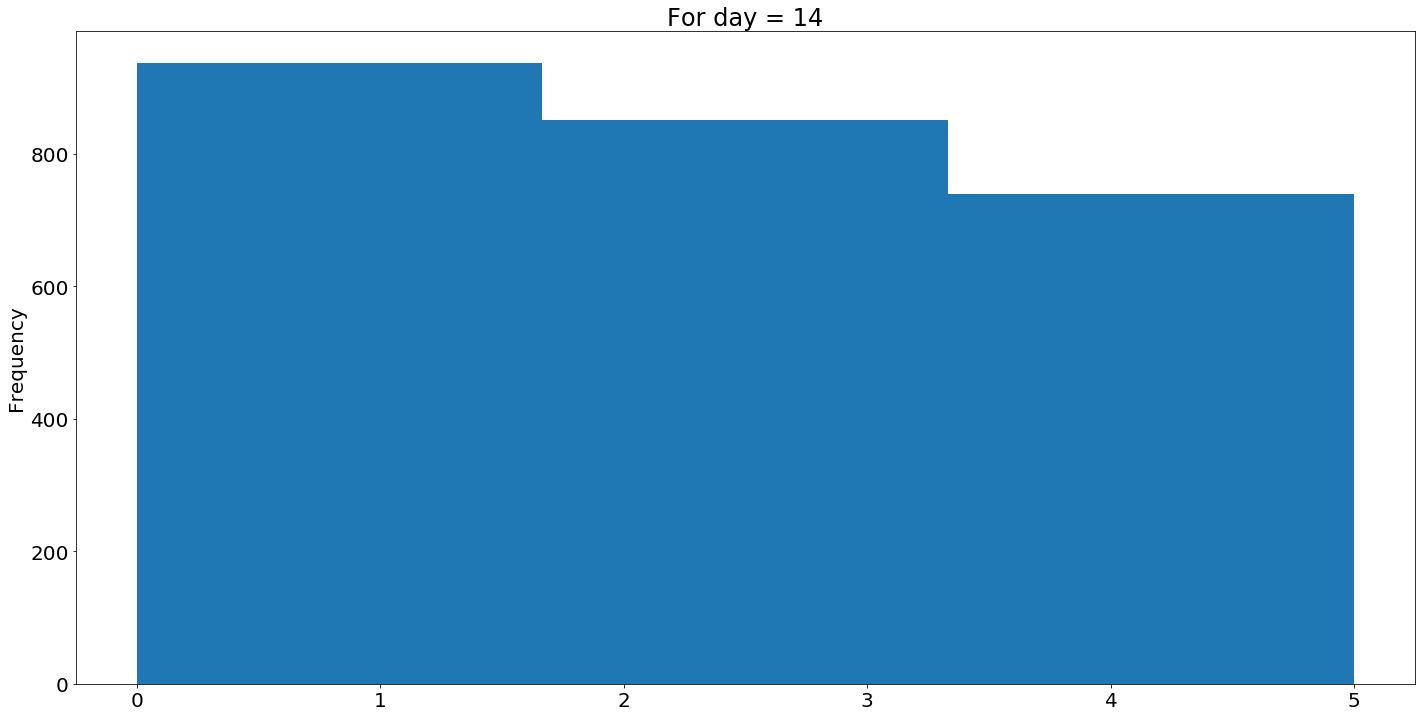

In [171]:
for day in unique_days:
    #print(day)
    day_data = data[data['day'] == day]
    day_data['hours'].plot(kind='hist', bins = 3)
    plt.title("For day = " +str(day))
    plt.show()
    
    

In [31]:
len(data)

302221

In [27]:
window = int(len(data)/10)
window

30222

In [69]:
data = data.sort_values('begin')
data.tail(10)

,trial,id1,id2,begin,end,time,UTC
163052,1,841,1500,1.373780e+09,1.373780e+12,[2.0],2013-07-14 05:34:34
222837,1,1114,1177,1.373780e+09,1.373780e+12,[13.0],2013-07-14 05:34:34
195908,1,959,1855,1.373780e+09,1.373780e+12,[2.0],2013-07-14 05:34:38
297200,1,1796,1903,1.373780e+09,1.373780e+12,[11.0],2013-07-14 05:34:40
302062,1,2007,2010,1.373780e+09,1.373780e+12,[4.0],2013-07-14 05:34:44
7701,1,258,1218,1.373780e+09,1.373780e+12,[2.999],2013-07-14 05:35:05
133194,1,724,1632,1.373780e+09,1.373780e+12,[6.0],2013-07-14 05:35:36
93952,1,567,1444,1.373780e+09,1.373780e+12,[2.0],2013-07-14 05:35:45
102184,1,611,903,1.373780e+09,1.373780e+12,[7.0],2013-07-14 05:35:50
194268,1,953,1738,1.373780e+09,1.373780e+12,[2.0],2013-07-14 05:35:56


In [70]:
data_10 = data[:window]
data_10.head()

,trial,id1,id2,begin,end,time,UTC
102932,1,612,1697,1.372829e+09,1.372829e+12,[3.0],2013-07-03 05:29:18
138807,1,740,829,1.372829e+09,1.372829e+12,[2.0],2013-07-03 05:29:23
225447,1,1138,1305,1.372829e+09,1.372829e+12,[5.999],2013-07-03 05:29:32
11636,1,267,876,1.372829e+09,1.372829e+12,[11.0],2013-07-03 05:29:41
126121,1,701,912,1.372829e+09,1.372829e+12,[10.0],2013-07-03 05:29:41


In [34]:
data_10.tail(10)

,trial,id1,id2,begin,end,time
238031,1,1218,2045,1.372894e+12,1.372894e+12,[2.0]
196265,1,961,1777,1.372894e+12,1.372894e+12,[2.0]
238032,1,1218,2045,1.372894e+12,1.372894e+12,[6.0]
95506,1,578,968,1.372894e+12,1.372894e+12,[6.0]
237941,1,1218,1677,1.372894e+12,1.372894e+12,[13.0]
163832,1,845,1435,1.372894e+12,1.372894e+12,[19.0]
18260,1,282,673,1.372894e+12,1.372894e+12,[2.0]
238579,1,1221,1276,1.372894e+12,1.372894e+12,[25.0]
33925,1,338,1530,1.372894e+12,1.372894e+12,[2.0]
148954,1,771,1603,1.372894e+12,1.372894e+12,[3.0]


In [35]:
data_20 = data[window:window*2]
data_20.head(10)

,trial,id1,id2,begin,end,time
95404,1,578,853,1.372894e+12,1.372894e+12,[2.0]
157816,1,808,961,1.372894e+12,1.372894e+12,[8.0]
244847,1,1257,1422,1.372894e+12,1.372894e+12,[4.0]
34365,1,339,1382,1.372894e+12,1.372894e+12,[9.999]
148955,1,771,1603,1.372894e+12,1.372894e+12,[2.0]
264641,1,1456,1754,1.372894e+12,1.372894e+12,[33.999]
236886,1,1214,1841,1.372894e+12,1.372894e+12,[7.999]
173840,1,880,909,1.372894e+12,1.372894e+12,[3.0]
234308,1,1202,2013,1.372894e+12,1.372894e+12,[5.0]
273666,1,1526,1646,1.372894e+12,1.372894e+12,[9.0]


In [37]:
data_20.tail(10)

,trial,id1,id2,begin,end,time
163794,1,845,1241,1.372953e+12,1.372953e+12,[2.0]
208016,1,1027,1156,1.372953e+12,1.372953e+12,[14.0]
165235,1,850,1127,1.372953e+12,1.372953e+12,[5.0]
174305,1,880,1669,1.372953e+12,1.372953e+12,[9.0]
3589,1,243,1444,1.372953e+12,1.372953e+12,[2.0]
170791,1,870,1829,1.372953e+12,1.372953e+12,[2.0]
160917,1,829,1857,1.372953e+12,1.372953e+12,[4.0]
79461,1,505,1661,1.372953e+12,1.372953e+12,[2.0]
249266,1,1290,1629,1.372953e+12,1.372953e+12,[5.0]
229065,1,1163,1826,1.372953e+12,1.372953e+12,[5.0]
